In [10]:
pip install tensorflow==2.10

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 106.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 107.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 61.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12

In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
import urllib
import zipfile
import pandas as pd
import numpy as np

In [3]:
def download_and_extract_data():
    url = 'https://storage.googleapis.com/download.tensorflow.org/data/certificate/satellitehurricaneimages.zip'
    urllib.request.urlretrieve(url, 'satellitehurricaneimages.zip')
    with zipfile.ZipFile('satellitehurricaneimages.zip', 'r') as zip_ref:
        zip_ref.extractall()

In [4]:
def preprocess(image, label):
    # NORMALIZE YOUR IMAGES HERE (HINT: Rescale by 1/.255)

    return image, label


In [5]:
download_and_extract_data()

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
base_dir = '/content/'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_damage_dir = os.path.join(train_dir, 'damage') # Directory with our training cat pictures
train_no_damage_dir = os.path.join(train_dir, 'no_damage') # Directory with our training dog pictures
validation_damage_dir = os.path.join(validation_dir, 'damage') # Directory with our validation cat pictures
validation_no_damage_dir = os.path.join(validation_dir, 'no_damage')# Directory with our validation dog pictures

train_no_damage_dir_fnames = os.listdir(train_no_damage_dir)
train_no_damage_dir_fnames = os.listdir(train_no_damage_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 64,
                                                    class_mode = 'binary',
                                                    target_size = (128, 128))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 64,
                                                          class_mode  = 'binary',
                                                          target_size = (128, 128))

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [7]:
IMG_SIZE = 128
BATCH_SIZE = 64

In [25]:
from tensorflow.keras.optimizers import RMSprop
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(.2),
    #tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2, 2),
    #tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(.2),
    # tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 156,
            epochs = 15,
            validation_steps = 31,
            verbose = 2)

Epoch 1/15
156/156 - 45s - loss: 0.6897 - accuracy: 0.6397 - val_loss: 0.5542 - val_accuracy: 0.8039 - 45s/epoch - 288ms/step
Epoch 2/15
156/156 - 44s - loss: 0.5713 - accuracy: 0.7341 - val_loss: 0.5626 - val_accuracy: 0.7077 - 44s/epoch - 282ms/step
Epoch 3/15
156/156 - 46s - loss: 0.5384 - accuracy: 0.7623 - val_loss: 0.6076 - val_accuracy: 0.7878 - 46s/epoch - 294ms/step
Epoch 4/15
156/156 - 44s - loss: 0.5011 - accuracy: 0.7939 - val_loss: 0.4503 - val_accuracy: 0.8790 - 44s/epoch - 284ms/step
Epoch 5/15
156/156 - 44s - loss: 0.4751 - accuracy: 0.8061 - val_loss: 0.5154 - val_accuracy: 0.8548 - 44s/epoch - 282ms/step
Epoch 6/15
156/156 - 45s - loss: 0.4466 - accuracy: 0.8212 - val_loss: 0.3975 - val_accuracy: 0.8886 - 45s/epoch - 291ms/step
Epoch 7/15
156/156 - 44s - loss: 0.4379 - accuracy: 0.8270 - val_loss: 0.3929 - val_accuracy: 0.8957 - 44s/epoch - 283ms/step
Epoch 8/15
156/156 - 44s - loss: 0.4190 - accuracy: 0.8410 - val_loss: 0.5972 - val_accuracy: 0.6951 - 44s/epoch - 285

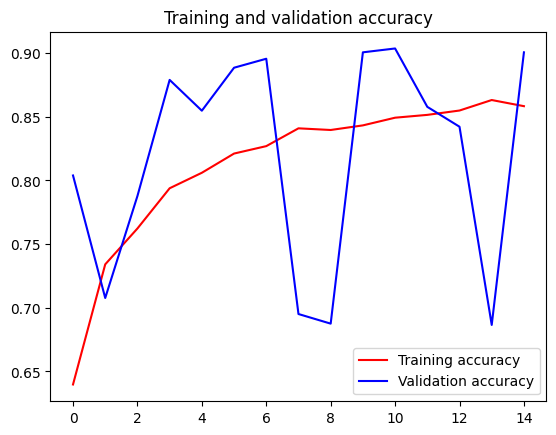

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()




plt.show()

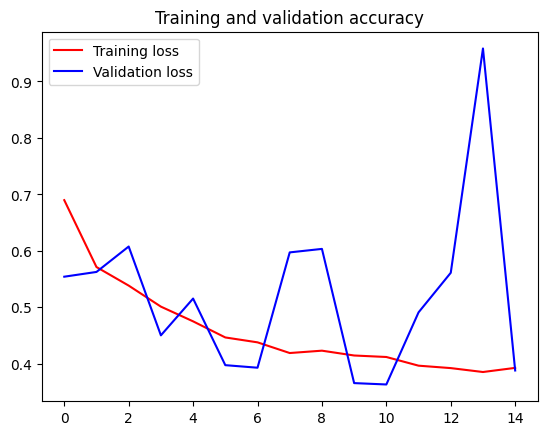

<Figure size 640x480 with 0 Axes>

In [28]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [11]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [12]:
model.save("huracain data.h5")